**Read Incoming Data Utility (One Vessel)**

Use this notebook to read in incoming data from GNSS and make random depths and place into a seafloor model file for one vessel only. 

In the cell below please enter the required parameters and data filenames.

In [4]:
# Input seafloor model file names
vesselA_model_file = 'vA_headhall_filled.nc'
vesselB_model_file = 'vB_hhparking_filled.nc'

Import Libraries

In [5]:
from datetime import datetime as dt
import serial
import pynmea2
import xarray as xr
import csv
import random
import geopandas
from shapely.geometry import Point, box
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pandas as pd
from shapely.geometry import Polygon
import numpy as np
from shapely.prepared import prep
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import contextily as cx
import math

Import the vessel model files into xarrays and pull out relavent metadata

In [6]:
# Open the data models for each vessel
vA = xr.open_dataset(vesselA_model_file)
vB = xr.open_dataset(vesselB_model_file)

# Pull out attributes for survey as a whole and for each vessel for easy use
home_point = vA.attrs['home_point']
away_point = vA.attrs['away_point']
allow_sigmaVert = vA.attrs['allowable_sigmaVertical']
input_geodetics = 'EPSG:4326'                                
project_geodetics = 'EPSG:32619' 

#vA_sigmaVert = vA.attrs['vesselA_sigmaVertical']
#vA_sigmaHor = vA.attrs['vesselA_sigmaHorizontal']
#vA_min_safe_depth = vA.attrs['vesselA_min_safe_depth']

Initialize functions for calculating running variance and initialize the geodetic transform.

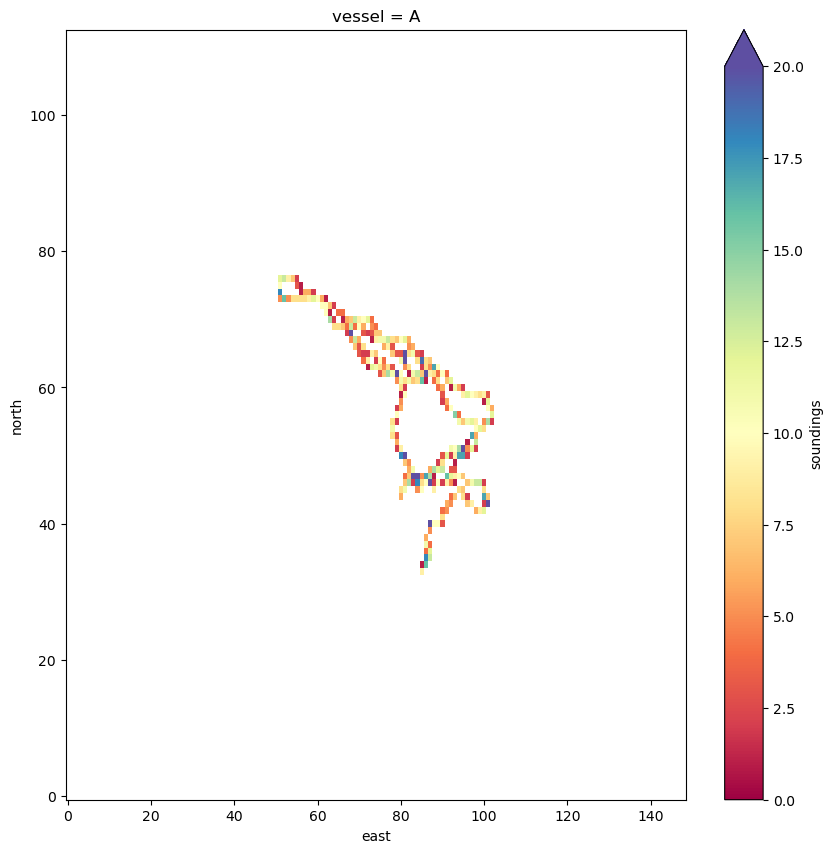

In [19]:
vA.soundings.sel(vessel='A').plot(figsize=(10,10), vmin=0, vmax=20, cmap='Spectral')

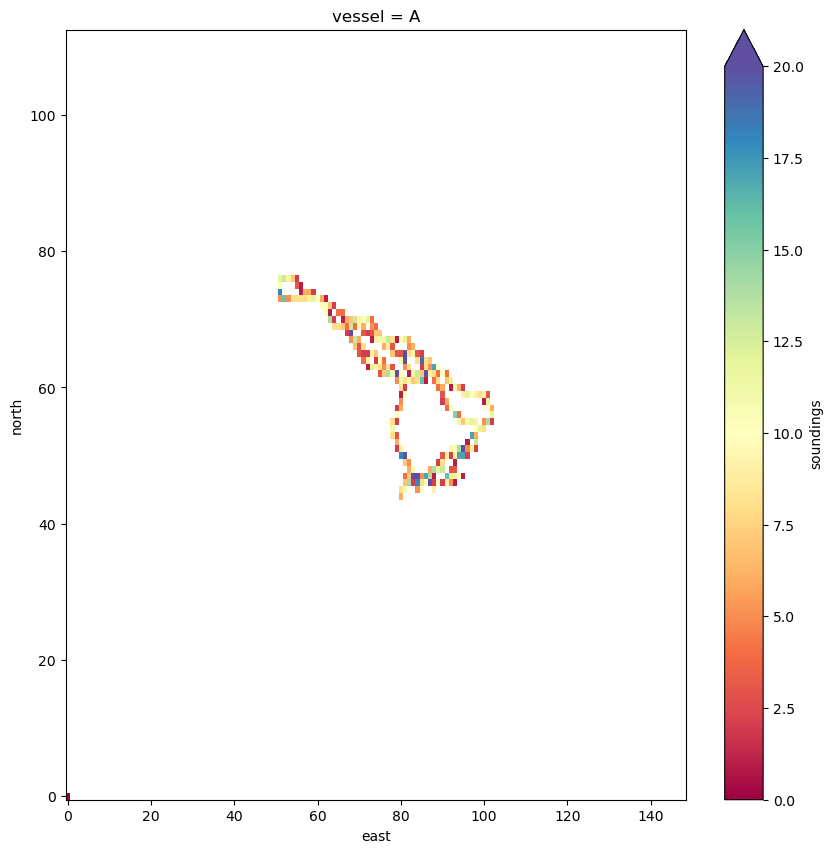

In [18]:
vB.soundings.sel(vessel='A').plot(figsize=(10,10), vmin=0, vmax=20, cmap='Spectral')

In [21]:
vA_df = vA.to_dataframe()
vB_df = vB.to_dataframe()

vA_df.to_csv('vA_df_full.csv')
vB_df.to_csv('vB_df_full.csv')

vA_df = vA_df.dropna(axis=0, thresh=3)
vB_df = vB_df.dropna(axis=0, thresh=3)

vA_df.to_csv('vA_df.csv')
vB_df.to_csv('vB_df.csv')

In [25]:
vALL = pd.concat([vA_df, vB_df], axis=1)

In [30]:
vALL = vA - vB

In [31]:
vALL

<xarray.Dataset> Size: 3MB
Dimensions:    (north: 113, east: 149, vessel: 5)
Coordinates:
  * north      (north) int32 452B 0 1 2 3 4 5 6 ... 106 107 108 109 110 111 112
  * east       (east) int32 596B 0 1 2 3 4 5 6 7 ... 142 143 144 145 146 147 148
  * vessel     (vessel) <U1 20B 'A' 'B' 'C' 'D' 'E'
Data variables:
    depth      (north, east, vessel) float64 673kB nan nan nan ... nan nan nan
    soundings  (north, east, vessel) float64 673kB nan nan nan ... nan nan nan
    M2         (north, east, vessel) float64 673kB nan nan nan ... nan nan nan
    stdev      (north, east, vessel) float64 673kB nan nan nan ... nan nan nan
    safe       (north, east, vessel) float64 673kB nan nan nan ... nan nan nan

In [28]:
vB_df

depth  soundings        M2     stdev  safe
north east vessel                                                
0     0    A        0.000000        0.0  0.000000  0.000000   NaN
11    55   B       14.453369        2.0  0.004346  0.046614   1.0
12    55   B       14.430798        4.0  0.004240  0.032558   1.0
      56   B       14.476541       10.0  0.050127  0.070801   1.0
      57   B       14.427275        7.0  0.014495  0.045506   1.0
...                      ...        ...       ...       ...   ...
77    62   B        8.278880        2.0  0.001312  0.025609   1.0
      63   B        8.203621        2.0  0.000011  0.002365   1.0
      81   B       10.091134        1.0  0.000000  0.000000   1.0
      82   B       10.277189        3.0  0.014077  0.068502   1.0
      83   B       10.288562        7.0  0.029664  0.065098   1.0

[879 rows x 5 columns]

In [29]:
vALL.to_csv('vALL.csv')

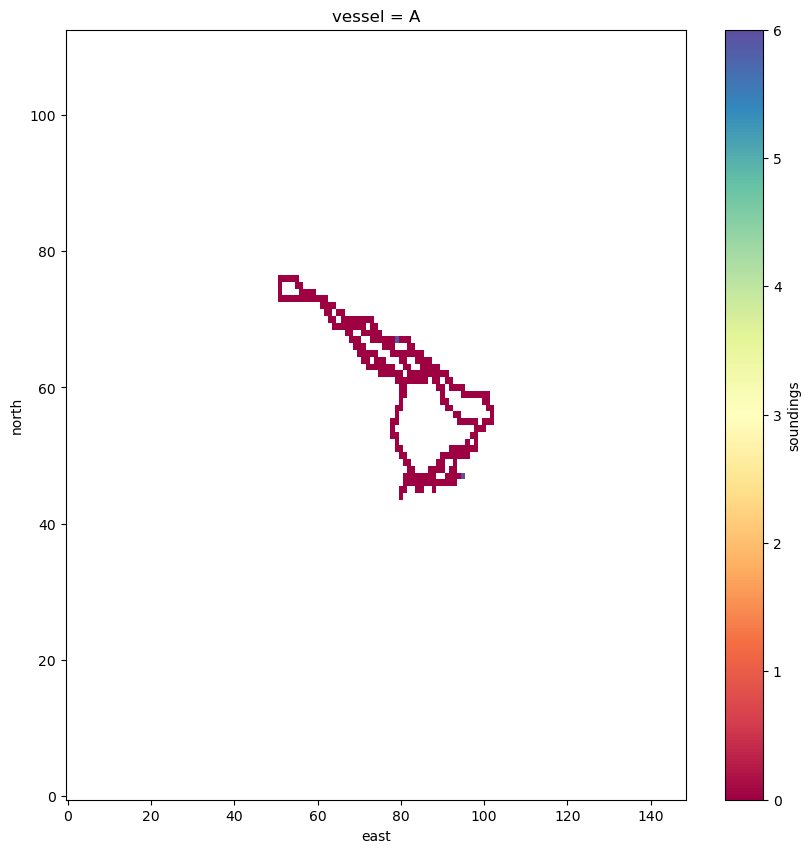

In [35]:
vALL.soundings.sel(vessel='A').plot(figsize=(10,10), cmap='Spectral')